In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_csv = pd.read_csv(city_data_to_load)
ride_data_csv = pd.read_csv(ride_data_to_load)
ride_data_csv
# Combine the data into a single dataset
complete_data = pd.merge(ride_data_csv, city_data_csv, how="outer")
# Display the data table for preview
complete_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
# Obtain the x and y coordinates for each of the three city types
urban_data = complete_data.loc[(complete_data["type"] == "Urban")]
urban_x = urban_data.groupby("city").count()["ride_id"]
urban_y = urban_data.groupby("city").mean()["fare"]
urban_s = (urban_data.groupby("city").mean()["driver_count"])*10

In [3]:
suburban_data = complete_data.loc[(complete_data["type"] == "Suburban")]
suburban_x = suburban_data.groupby("city").count()["ride_id"]
suburban_y = suburban_data.groupby("city").mean()["fare"]
suburban_s = (suburban_data.groupby("city").mean()["driver_count"])*10

In [4]:
rural_data = complete_data.loc[(complete_data["type"] == "Rural")]
rural_x = rural_data.groupby("city").count()["ride_id"]
rural_y = rural_data.groupby("city").mean()["fare"]
rural_s = (rural_data.groupby("city").mean()["driver_count"])*10

## Bubble Plot of Ride Sharing Data

Text(42,33,'Note: Circle size correlates with driver count per city')

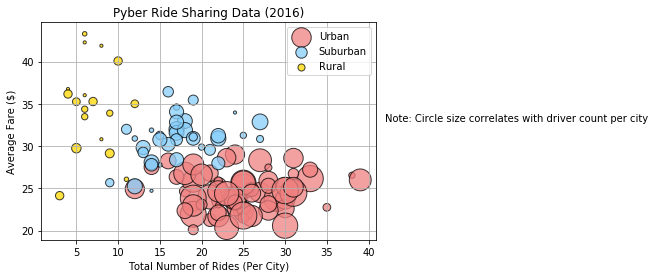

In [5]:
# Build the scatter plots for each city types
plt.scatter(
    urban_x, 
    urban_y, 
    s=urban_s, 
    facecolor="lightcoral", 
    edgecolor="black", 
    label="Urban", 
    alpha=0.75)

plt.scatter(
    suburban_x, 
    suburban_y, 
    s=suburban_s, 
    facecolor = "lightskyblue", 
    edgecolor="black", 
    label="Suburban",
    alpha=0.75)

plt.scatter(
    rural_x, 
    rural_y, 
    s=rural_s, 
    facecolor = "gold", 
    edgecolor="black", 
    label="Rural",
    alpha=0.75)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
plt.legend(loc="best")

# Incorporate a text label regarding circle size
plt.text(42,33,"Note: Circle size correlates with driver count per city")

# Save Figure


## Total Fares by City Type

Text(0.5,1,'% of Total Fares by City Type')

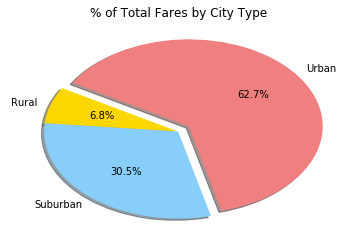

In [6]:
# Calculate Type Percents
fare_by_type = complete_data.groupby("type").sum()["fare"]
total_fare = complete_data.sum()["fare"]
type_percents = (fare_by_type / total_fare) * 100
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0,0,0.1]
# Build Pie Chart
plt.pie(
    type_percents, 
    startangle=150, 
    shadow=True, 
    labels=type_percents.index, 
    explode=explode, 
    autopct="%1.1f%%", colors=colors)
plt.title("% of Total Fares by City Type")
# Save Figure


## Total Rides by City Type

([<matplotlib.patches.Wedge at 0x192b9e47a90>,
 [Text(-1.03016,0.385701,'Rural'),
  Text(-0.886342,-0.651459,'Suburban'),
  Text(1.07071,0.54184,'Urban')],
 [Text(-0.561907,0.210383,'5.3%'),
  Text(-0.483459,-0.355341,'26.3%'),
  Text(0.624578,0.316073,'68.4%')])

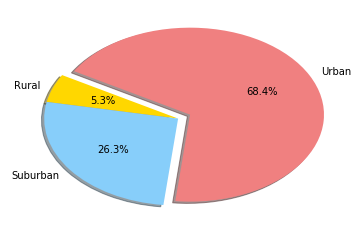

In [7]:
# Calculate Ride Percents
ride_by_type = complete_data.groupby("type").count()["ride_id"]
total_rides = complete_data.count()["ride_id"]
ride_percents = ride_by_type / total_rides * 100
# Build Pie Chart
plt.pie(
    ride_percents, 
    colors=colors, 
    labels=ride_percents.index, 
    startangle=150, 
    autopct="%1.1f%%", 
    explode=explode, 
    shadow=True)
# Save Figure


## Total Drivers by City Type

([<matplotlib.patches.Wedge at 0x192bb1918d0>,
 [Text(1.17948,0.220958,'Urban'),
  Text(-1.0942,-0.112843,'Suburban'),
  Text(-0.839214,-0.711139,'Rural')],
 [Text(0.688031,0.128892,'80.9%'),
  Text(-0.596835,-0.0615505,'16.5%'),
  Text(-0.457753,-0.387894,'2.6%')])

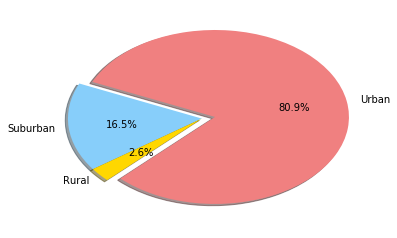

In [21]:
# Calculate Driver Percents
#driver_by_type = complete_data.groupby(["type","city"]).mean()["driver_count"]
#driver_by_type
urban_drivers = urban_data.groupby("city").mean()["driver_count"].sum()

suburban_drivers = suburban_data.groupby("city").mean()["driver_count"].sum()

rural_drivers = rural_data.groupby("city").mean()["driver_count"].sum()

total_drivers = complete_data.groupby("city").mean()["driver_count"].sum()

drivers_by_type = pd.Series((urban_drivers, suburban_drivers, rural_drivers),index=["Urban","Suburban","Rural"])

drivers_percent = drivers_by_type / total_drivers * 100 

# Build Pie Charts
plt.pie(
    drivers_percent, 
    colors=["lightcoral","lightskyblue","gold"], 
    explode=[0.1,0,0],
    labels=drivers_percent.index, 
    startangle=225, 
    autopct="%1.1f%%", 
    shadow=True)
# Save Figure
